# My first applied machine learning notebook. 
We are going to get some data about cars and use it to create and evaluate a predictive model.  Here are the steps will we use:
1. Read in the data from a CSV file
2. Clean the data
3. Create a model and fit it to the data
4. Get performance metrics for the model

### Getting the data:
We need to get the data where we can find it.   Copy automobile_price_data3.csv into the same Getting the data:

* Assignment is not an expression. Nothing is displayed.
* Print will cause something to be displayed.
* The last expression evaluated in a cell will be displayed.

Index(['normalized-losses', 'make', 'fuel', 'doors', 'body', 'drive', 'weight',
       'engine-size', 'bhp', 'mpg', 'price'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   make               205 non-null    object 
 2   fuel               205 non-null    object 
 3   doors              203 non-null    object 
 4   body               205 non-null    object 
 5   drive              205 non-null    object 
 6   weight             205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bhp                203 non-null    float64
 9   mpg                205 non-null    int64  
 10  price              201 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 17.7+ KB


array([[<Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'engine-size'}>,
        <Axes: title={'center': 'bhp'}>],
       [<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

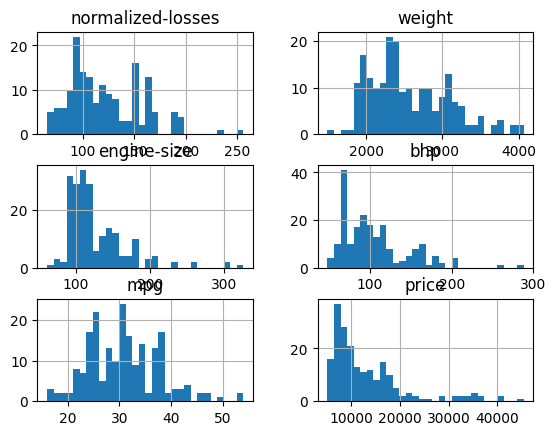

In [32]:
import pandas as pd 
data_frame = pd.read_csv("automobile_price_data3.csv")
3**10
print(data_frame.keys()) 
print() 
data_frame.head(n=10)
data_frame.info() 
data_frame.hist(bins=30)


### Clean the data:
Remove columns or rows that have missing data.
Look at the distribution of the data values

In [18]:
pip install scikit-learn

     ---------------------------------------- 11.0/11.0 MB 6.8 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 KB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\habto\HW-venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [19]:
data_frame.drop(axis='columns', labels='normalized-losses', inplace=True) 
data_frame.dropna(axis='index', how="any", inplace=True) 

KeyError: "['normalized-losses'] not found in axis"

### Create and train a model
We need to split the data into a training set and a test set

In [20]:
from sklearn.model_selection import train_test_split 
train_set, test_set = train_test_split(data_frame, 
test_size=0.2, random_state=123) 
print(len(train_set), len(test_set)) 

157 40


### Determine the performance of the model

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [43]:
X = train_set[['weight', 'engine-size', 'bhp', 'mpg']] 
y = train_set["price"] 
reg.fit(X, y) 

LinearRegression()

In [35]:
print("The bias is " , reg.intercept_) 
print("The feature coefficients are ", reg.coef_) 

The bias is  -17922.52413652654
The feature coefficients are  [ 4.58631495 82.32373485 66.79759309 72.85364667]


In [36]:
print("The score for the training set is", reg.score(X,y))

The score for the training set is 0.8230155353613751


In [37]:
# Check the performance on the test set 
X_test = test_set[['weight', 'engine-size', 'bhp', 'mpg']] 
y_test = test_set["price"] 
print("The score for the test set is", reg.score(X_test,y_test)) 

The score for the test set is 0.5528901621626463


In [48]:
import pandas 
data = pd.read_csv("C:\ML\Module 2\customer_churn_data.csv")
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5880,5880,5880.000000,5880,5880,5880.000000,5880,5880,5880,5880,...,5880,5880,5880,5880,5880,5880,5880,5880.000000,5880.000000,5880
unique,5880,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,CUST5879,Male,NaN,Yes,No,NaN,Yes,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card,NaN,NaN,No
freq,1,2950,NaN,2995,3004,NaN,2941,2939,2029,2029,...,2029,2029,2029,2029,2020,2990,1503,NaN,NaN,2982
mean,NaN,NaN,0.500680,NaN,NaN,36.549150,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.157779,2566.813165,NaN
std,NaN,NaN,0.500042,NaN,NaN,20.909674,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.804615,1910.017743,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,20.030000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.717500,1020.217500,NaN
50%,NaN,NaN,1.000000,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.155000,2136.445000,NaN
75%,NaN,NaN,1.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.457500,3767.665000,NaN


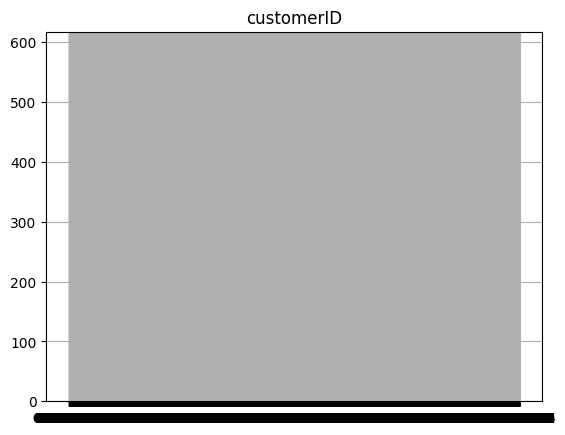

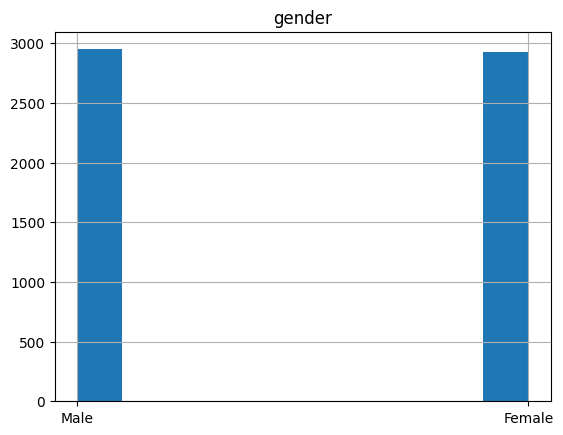

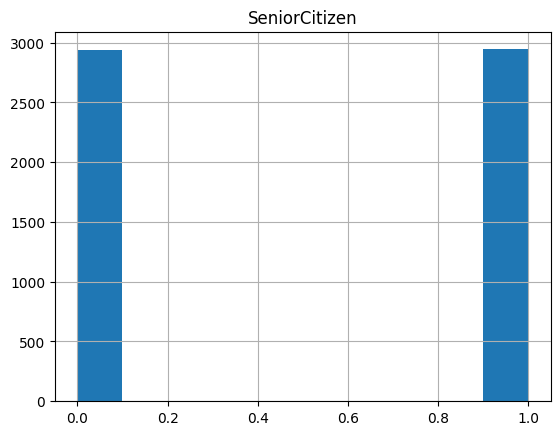

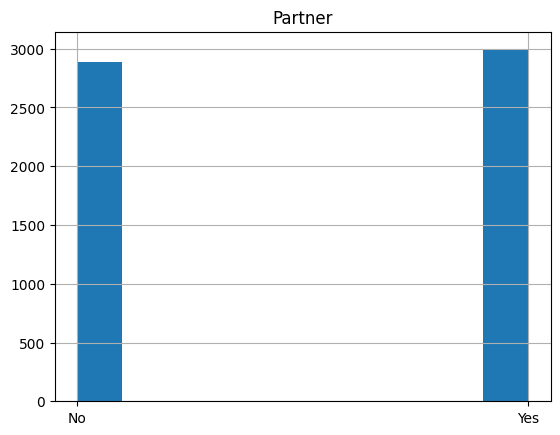

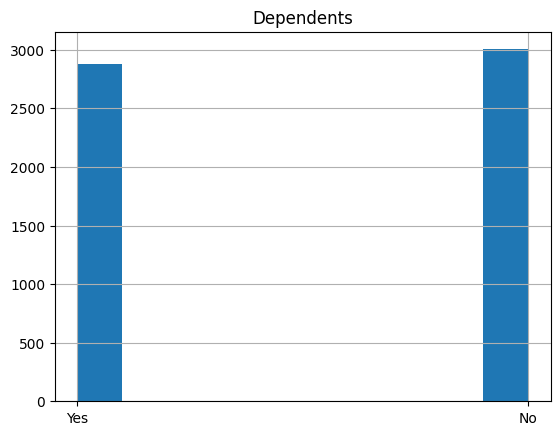

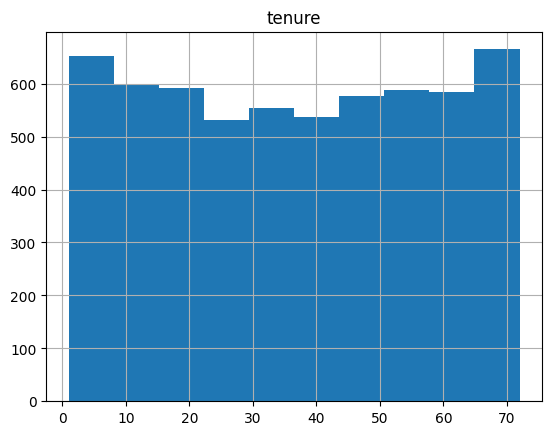

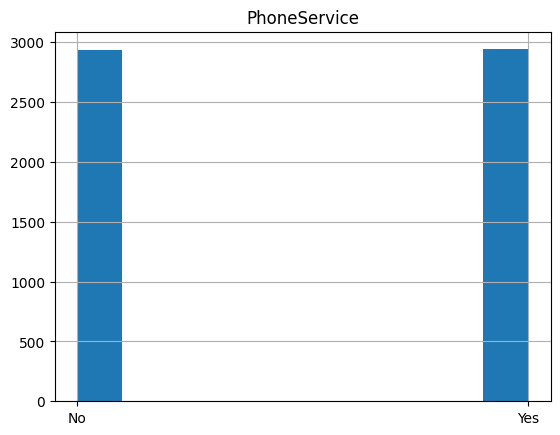

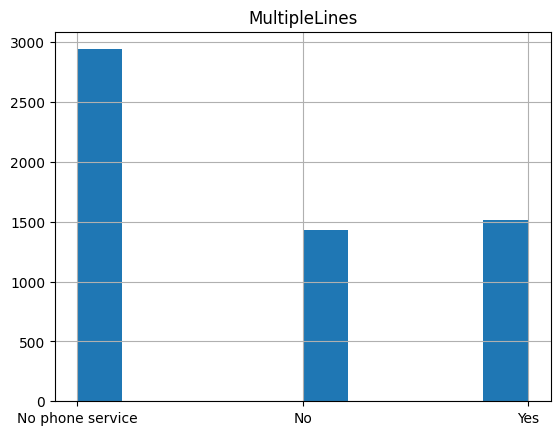

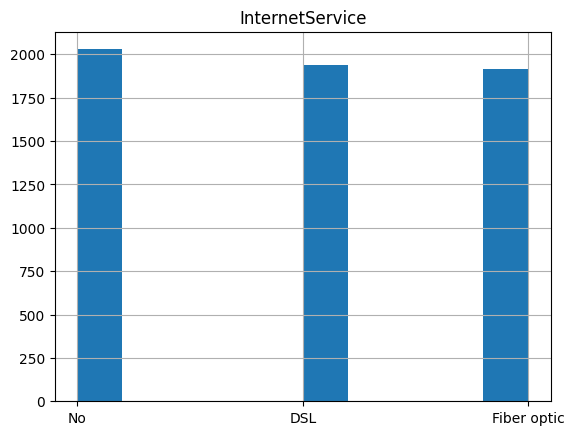

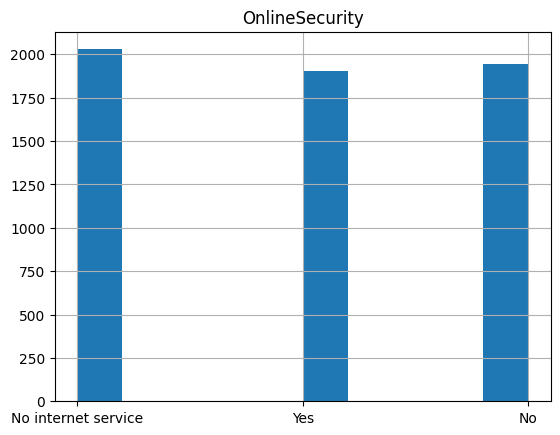

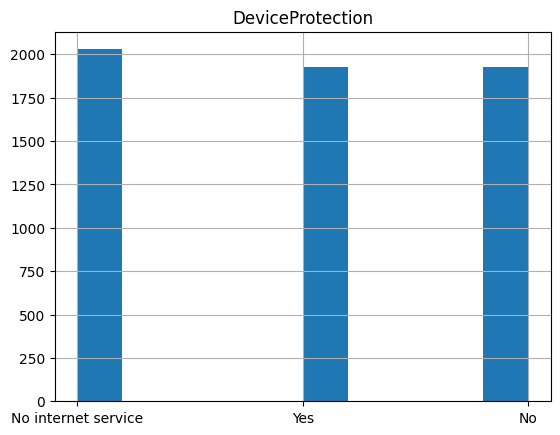

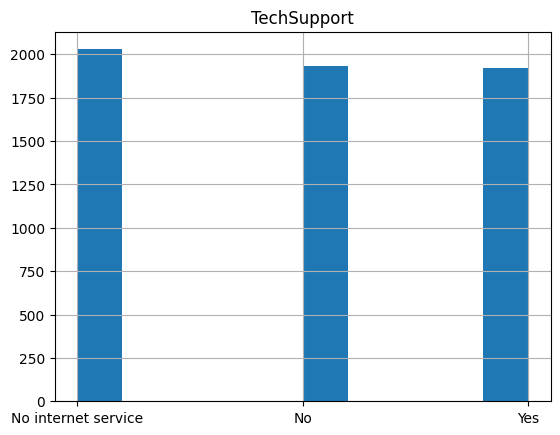

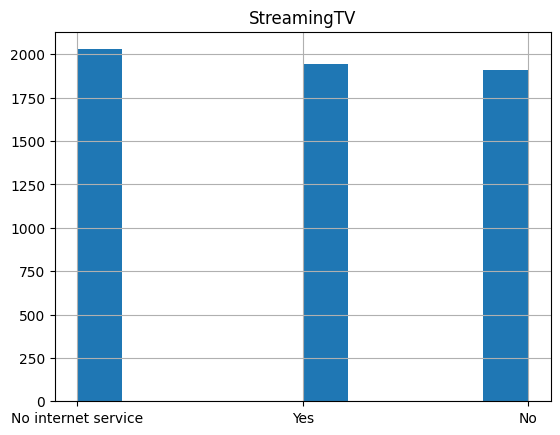

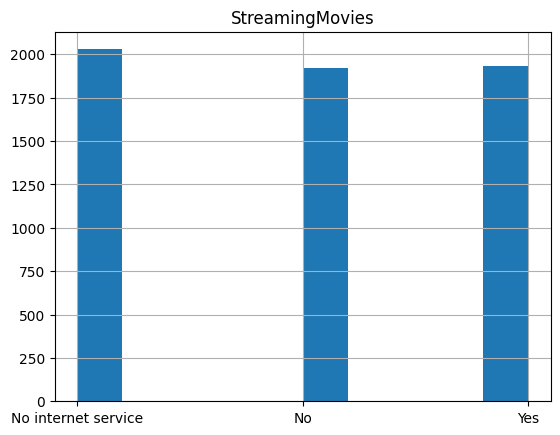

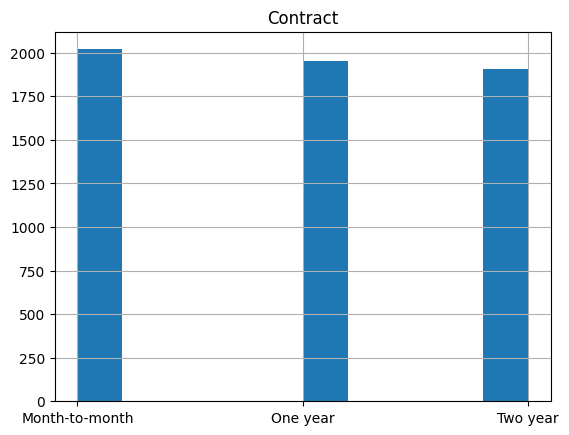

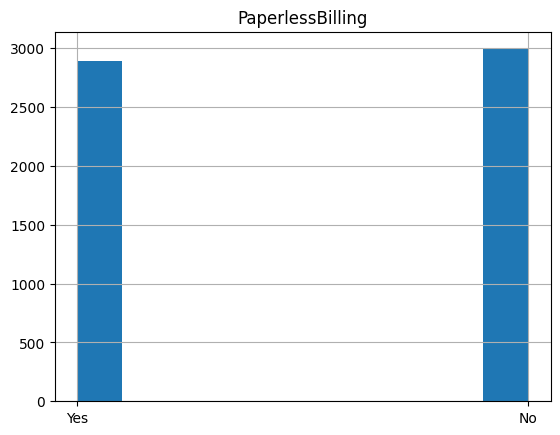

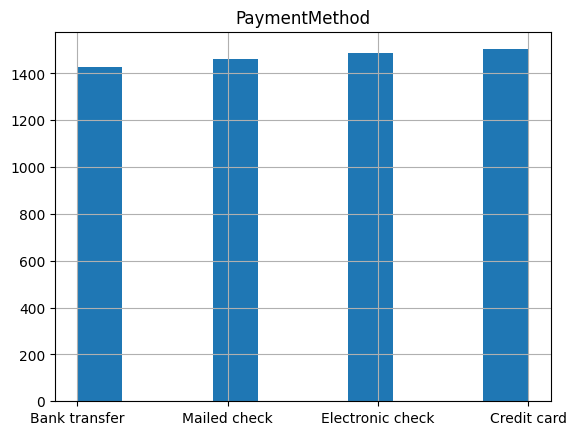

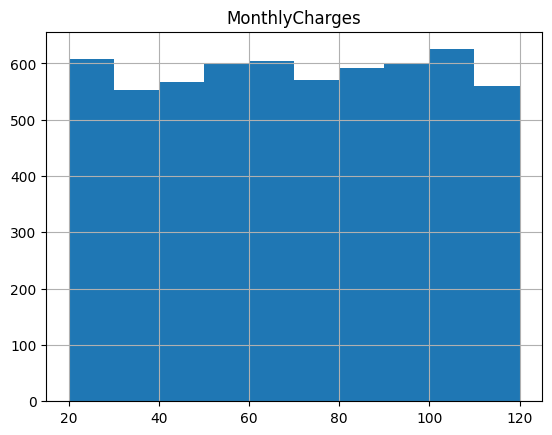

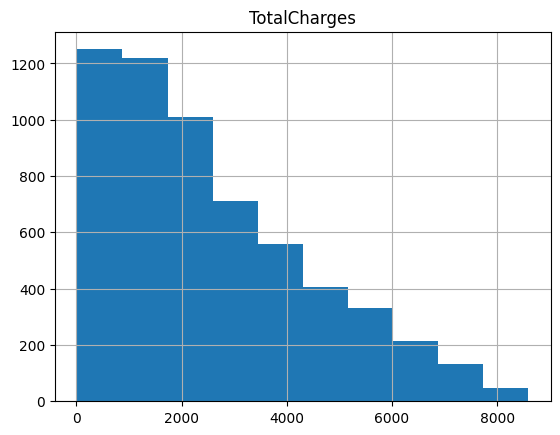

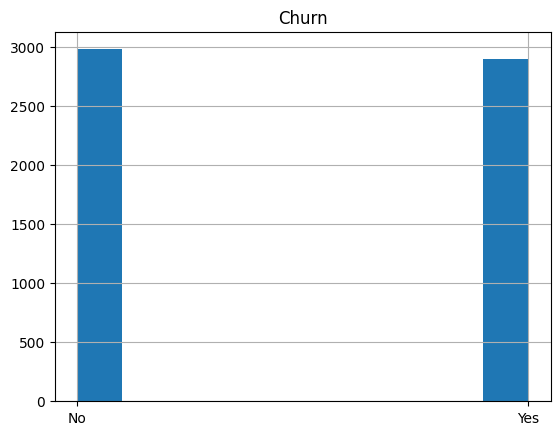

In [50]:
import matplotlib.pyplot as plt

# Define the list of features correctly
features = [
    'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges', 'Churn'
]

# Loop through each feature and plot the histogram
for feature in features:
    if feature in data.columns:
        data[feature].hist()
        plt.title(feature)
        plt.show()

In [1]:
print(data.head()

SyntaxError: unexpected EOF while parsing (3402843323.py, line 1)

In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv('C:\ML\Module 2\customer_churn_data.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the columns with missing values and their count
print("Missing values in each column:\n", missing_values)

# Display rows with any missing values
rows_with_missing = df[df.isnull().any(axis=1)]
print("Rows with missing values:\n", rows_with_missing)

# Display total number of missing values
total_missing = df.isnull().sum().sum()
print("Total number of missing values in the dataset:", total_missing)


  customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   CUST0000    Male              0      No        Yes      23           No   
1   CUST0001  Female              0     Yes         No      43           No   
2   CUST0002    Male              1      No         No      51          Yes   
3   CUST0003    Male              1      No         No      72          Yes   
4   CUST0004    Male              1      No         No      25          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0  No phone service              No  No internet service  ...   
1  No phone service             DSL                  Yes  ...   
2                No             DSL                   No  ...   
3               Yes             DSL                  Yes  ...   
4               Yes             DSL                   No  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service  

In [3]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette=['#5975A4', '#CC8963'])
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


NameError: name 'plt' is not defined

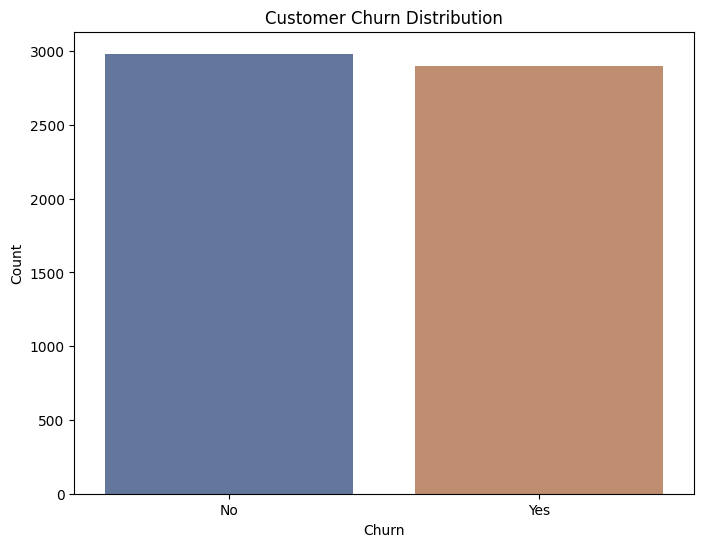

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:\ML\Module 2\customer_churn_data.csv')

# Create the churn histogram
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette=['#5975A4', '#CC8963'])
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


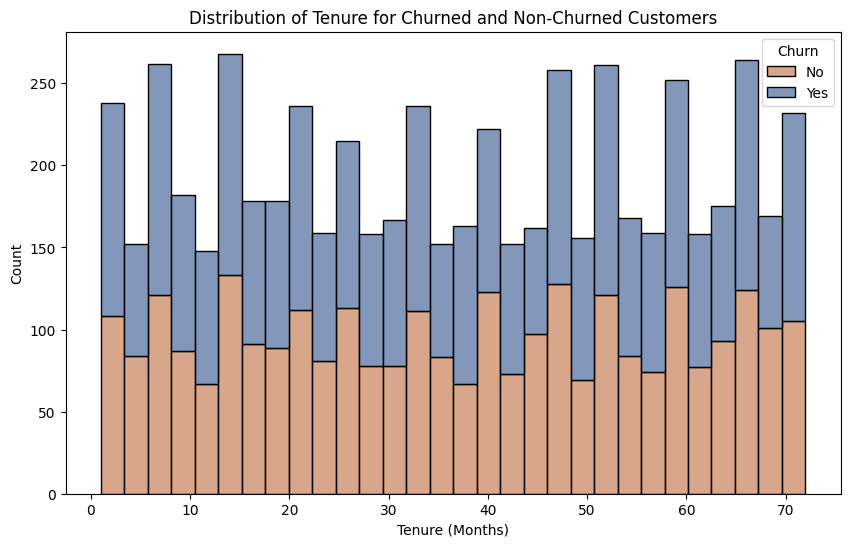

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:\ML\Module 2\customer_churn_data.csv')

# Convert the Churn column to binary (1 for 'Yes', 0 for 'No')
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Plot the relationship between tenure and churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette=['#5975A4', '#CC8963'])
plt.title('Distribution of Tenure for Churned and Non-Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


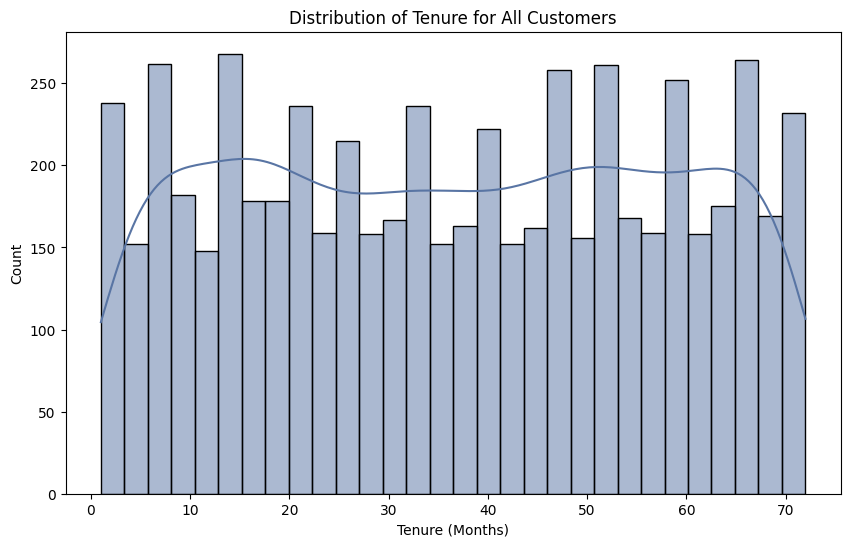

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:\ML\Module 2\customer_churn_data.csv')

# Plot the distribution of tenure
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', bins=30, kde=True, color='#5975A4')
plt.title('Distribution of Tenure for All Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()


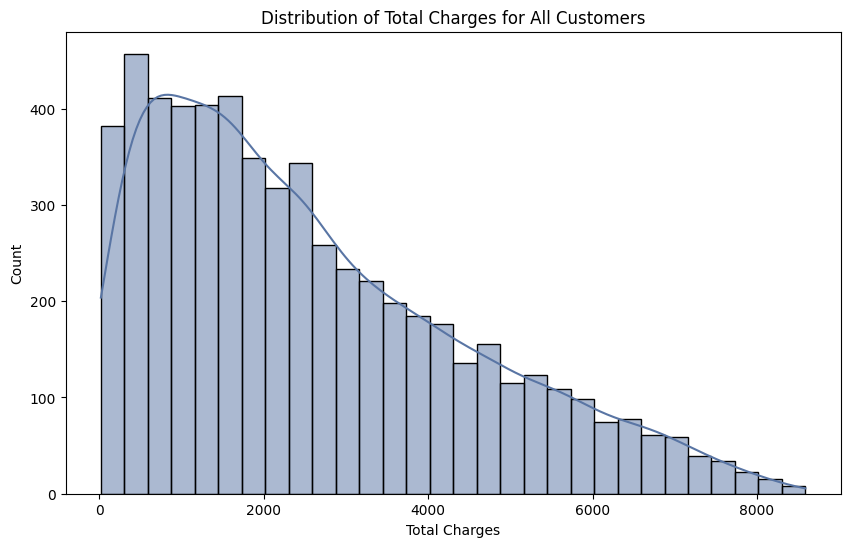

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:\ML\Module 2\customer_churn_data.csv')

# Convert TotalCharges to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with NaN TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

# Plot the distribution of TotalCharges
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalCharges', bins=30, kde=True, color='#5975A4')
plt.title('Distribution of Total Charges for All Customers')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.show()


In [10]:
import pandas as pd

# Assuming the dataset is loaded into a DataFrame named 'df'
df = pd.read_csv('C:\ML\Module 2\customer_churn_data.csv')

# Convert categorical service columns to binary values
service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in service_columns:
    df[column] = df[column].apply(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else 0)

# Create the 'ServiceCount' feature
df['ServiceCount'] = df[service_columns].sum(axis=1)

# Display the first few rows of the updated DataFrame
print(df[['customerID', 'ServiceCount']].head())

# Save the updated DataFrame to a new CSV file (optional)
df.to_csv('telecom_customer_churn_with_service_count.csv', index=False)


  customerID  ServiceCount
0   CUST0000             0
1   CUST0001             3
2   CUST0002             4
3   CUST0003             4
4   CUST0004             4
